In [3]:
import numpy as np
import csv 
import matplotlib.pyplot as plt
import pandas as pd 

#Standalone DOE generator (3D grid)Variables:
#x = residence time
#y = temperature
#z = ratio (fraction 0..1)
#Generates a full factorial grid of points
#Saves DOE points to CSV

In [22]:
# ---------------- User inputs ----------------
x_min, x_max, nx = 20.0, 80.0, 3   # temperature range
y_min, y_max, ny = 2.0, 60.0, 3 # residence time range, min, max, number of points (0 indexed)
z_min, z_max, nz = 0.0, 1.0, 3   # ratio range (0 = 100% B, 1 = 100% A)

output_file = "doe_points.csv"
# ---------------------------------------------

In [25]:
# Generate grid
xs = np.linspace(x_min, x_max, nx) #evenly spaced numbers between start and stop (x_min,x_max), nx = number of points. xs is an array of these
ys = np.linspace(y_min, y_max, ny) # same with ys
zs = np.linspace(z_min, z_max, nz) # same with zs

points = []
idx = 0
for x in xs: #nested loop - for each x:
    for y in ys: #the program goes through all values of y, for each y:
        for z in zs: #the program goes through all values of z
            points.append((idx, x, y, z)) # produces every possible x,y,z combination 
            idx += 1 #indexes so each line is unique, should look like index, x value, y value, z value (should have 27 points 0 indexed)


# Convert to DataFrame
df = pd.DataFrame(points, columns=["index", "x_temperature", "y_res_time", "z_ratio"])

# Save to CSV
df.to_csv(output_file, index=False)

print(f"DOE generated with {len(df)} points → saved to {output_file}")





DOE generated with 27 points → saved to doe_points.csv


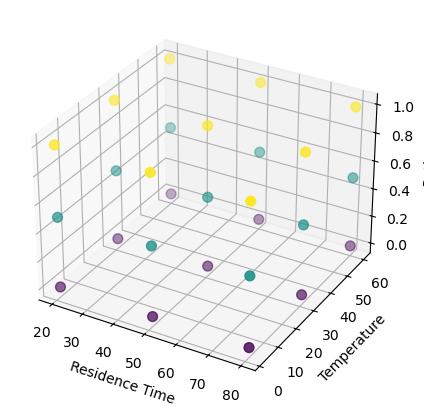

In [ ]:

# Color by z_ratio (gradient)
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    df["x_temperature"],
    df["y_res_time"],
    df["z_ratio"],
    c=df["z_ratio"],         
    cmap="viridis",           
    s=50
)

ax.set_xlabel("Residence Time")
ax.set_ylabel("Temperature")
ax.set_zlabel("Ratio")
plt.show()

# needs to be truly random  
